### Data Visualization

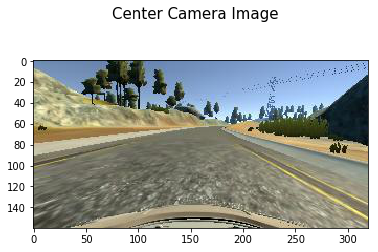

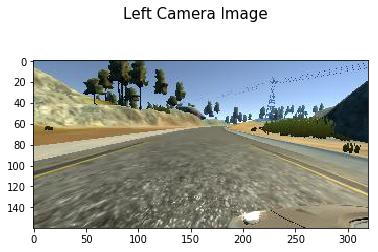

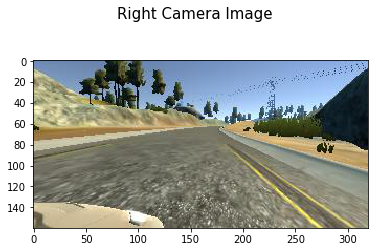

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle

udacity_driving_log = "data/udacity_driving_log.csv"
full_driving_log = "data/driving_log.csv"
data_directory = "data/"

samples = []
with open(udacity_driving_log, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
                samples.append(line)

# remove header
del samples[0]
# shuffle samples
samples = shuffle(samples)

random_line = samples[0]

center_image = cv2.imread(data_directory + random_line[0].strip())
left_image = cv2.imread(data_directory + random_line[1].strip())
right_image = cv2.imread(data_directory + random_line[2].strip())

# BGR to RGB
center_image = cv2.cvtColor(center_image, cv2.COLOR_BGR2RGB)
left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)

%matplotlib inline

fig1 = plt.figure()
plt.imshow(center_image)
fig1.suptitle('Center Camera Image', fontsize=15)

fig1 = plt.figure()
plt.imshow(left_image)
fig1.suptitle('Left Camera Image', fontsize=15)

fig1 = plt.figure()
plt.imshow(right_image)
fig1.suptitle('Right Camera Image', fontsize=15)

plt.show()

### Data Pre Processing

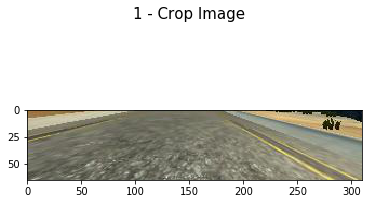

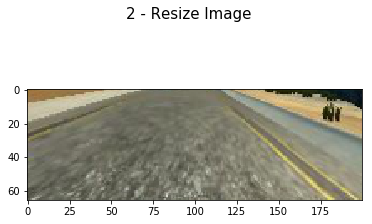

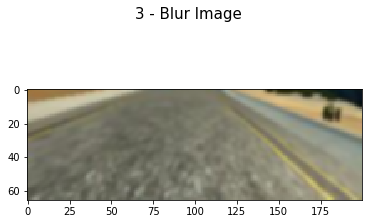

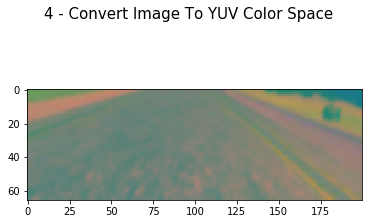

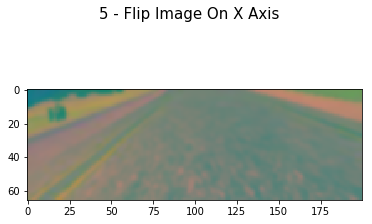

In [2]:
# Crop image to remove noise
cropped_image  = center_image[70:135,10:350]
# Resize image to same shape as nvidia model
resized_image = cv2.resize(cropped_image, (200, 66), interpolation=cv2.INTER_AREA)
# Blur the image
blurred_image = cv2.GaussianBlur(resized_image, (5,5), 0)
# Convert to YUV color space like nvidia
yuv_image = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2YUV)
# Flip x axis to remove bias to turn side
flipped_image = np.fliplr(yuv_image)

%matplotlib inline

fig1 = plt.figure()
plt.imshow(cropped_image)
fig1.suptitle('1 - Crop Image', fontsize=15)

fig2 = plt.figure()
plt.imshow(resized_image)
fig2.suptitle('2 - Resize Image', fontsize=15)

fig3 = plt.figure()
plt.imshow(blurred_image)
fig3.suptitle('3 - Blur Image', fontsize=15)

fig4 = plt.figure()
plt.imshow(yuv_image)
fig4.suptitle('4 - Convert Image To YUV Color Space', fontsize=15)

fig5 = plt.figure()
plt.imshow(flipped_image)
fig5.suptitle('5 - Flip Image On X Axis', fontsize=15)

plt.show()

### Data Distribution

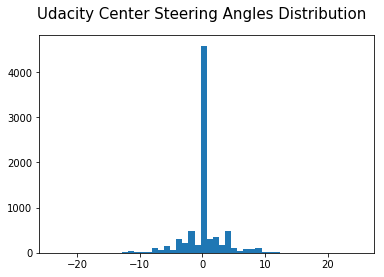

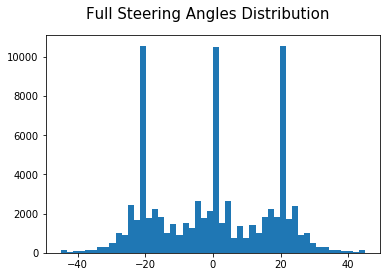

In [3]:
angle_correction = 20

udacity_center_steering_angles_samples = []
with open(udacity_driving_log, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
                udacity_center_steering_angles_samples.append(line)
# remove header
del udacity_center_steering_angles_samples[0]
udacity_center_steering_angles = []
for sample in udacity_center_steering_angles_samples:
    center_angle = float(sample[3].strip()) * 25.0
    udacity_center_steering_angles.append(center_angle)
    
full_steering_angles_samples = []
with open(full_driving_log, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
                full_steering_angles_samples.append(line)
# remove header
del full_steering_angles_samples[0]
full_steering_angles = []
for sample in full_steering_angles_samples:
    center_angle = float(sample[3].strip()) * 25.0
    left_angle = center_angle + angle_correction
    right_angle = center_angle - angle_correction
    flipped_center_angle = center_angle;
    flipped_left_angle = -left_angle;
    flipped_right_angle = -right_angle;
    full_steering_angles.extend([center_angle,left_angle,right_angle,flipped_center_angle,flipped_left_angle,flipped_right_angle])

%matplotlib inline

# Plot histogram of udacity data
fig1 = plt.figure()
plt.hist(udacity_center_steering_angles, bins=50)
fig1.suptitle('Udacity Center Steering Angles Distribution', fontsize=15)

# Plot histogram of full data
fig2 = plt.figure()
plt.hist(full_steering_angles, bins=50)
fig2.suptitle('Full Steering Angles Distribution', fontsize=15)

plt.show()     

### Training Loss

Using TensorFlow backend.


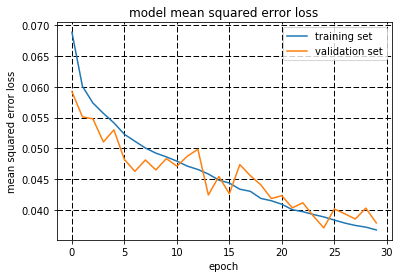

In [4]:
from keras.models import Model
import matplotlib.pyplot as plt

loss = [0.068871180251663028, 0.060101735623444917, 0.057375433738452185, 0.055691798874538137, 0.054151062491952874, 0.0522907439031099, 0.051166016957106264, 0.050064025865012116, 0.049232139304043604, 0.048622873874235584, 0.047929187568919153, 0.047122038569044969, 0.046577625721461006, 0.045840060552428424, 0.044847699965816425, 0.044373964819487514, 0.043369719711643114, 0.043027251758138478, 0.041876322985140935, 0.041497550397178569, 0.040929234614210018, 0.04004308834964336, 0.039721928734120011, 0.039263234860970019, 0.038872178060378806, 0.038356870686625515, 0.037871004510653498, 0.03748490263620053, 0.037210865812309431, 0.036758835762460744]
valid_loss = [0.059228663254347648, 0.055128304455621911, 0.054807904131017195, 0.051044886931777, 0.053016160283254204, 0.048201966436478026, 0.046272740786017487, 0.048117451446799443, 0.046508129892466339, 0.048349037760953957, 0.047118106678106231, 0.048740560766667169, 0.049860553273950406, 0.042434695464293397, 0.045443313287095097, 0.042640948621349817, 0.047367804597078254, 0.045571335243333566, 0.044083117382212968, 0.041855639867495575, 0.04232026217298987, 0.040333343386385959, 0.041176223420322032, 0.039021624007332445, 0.037093029610614565, 0.04016136452885815, 0.039374748343929233, 0.0385315833899414, 0.040299219053178098, 0.037900781602855975]

plt.plot(loss)
plt.plot(valid_loss)
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

### Model Summary

In [5]:
from keras.models import load_model

load_model('model.h5').summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 66, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 98, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 47, 36)    21636       convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 5, 22, 48)     43248       convolution2d_2[0][0]            
___________________________________________________________________________________________